# Assignement 1

You will hand in the assignment through a Jupyter notebook, also with your environment and the dataset you picked, both zipped together and submitted as one file. Please name your file so that it contains your group number. It is important that you clearly state the tasks you are performing on the dataset as questions or something similar in the notebook before you do the operations on the data. Also make sure to document your solutions and your thinking so that it can easily be followed. If you fail to do these things, you may not pass this assignment.

The deadline of this assignment is on April 12, 2025 to get bonus points, or before the exam (in which case no bonus points are awarded).

Re-submission 1 is by the end of week 33, 2025.

Re-submission 2 is by the end of week 2, 2026.

# Exercice 1 task
- Data exploration
- Data proprocessing
- Combining datasets

We choosed to go with Data exploration. We are gonna see the different sectors and gas present in the dataset, the years and is there is any missing values.

# Open the csv
Read the csv and print it's content to see if it is correct

In [120]:
import pandas as pd

# Read the data from the csv and print it to be sure it worked
df = pd.read_csv('../Total air emissions by greenhouse gas.csv', na_values="..")
print(df.to_string())

                                    greenhouse gas                                                                 sector      1990      1991      1992      1993      1994      1995      1996      1997      1998      1999      2000      2001      2002      2003      2004      2005      2006      2007      2008      2009      2010      2011      2012      2013      2014      2015      2016      2017      2018      2019      2020      2021      2022      2023
0             Total Greenhouse Gases (kt CO2-eqv.)  NATIONAL TOTAL (excluding LULUCF, excluding international transports)   71203.3   71338.8   71022.5   71242.7   73749.3   73135.2   77030.2   72145.4   72526.6   69370.9   68131.8   68886.2   69501.1   69812.4   69132.8   66251.5   65901.0   64741.8   62344.5   58122.7   64123.2   59742.6   56829.5   55209.9   53481.9   53283.7   53198.3   52294.3   51434.3   50196.4   45981.9   47721.8   45215.4   44386.0
1             Total Greenhouse Gases (kt CO2-eqv.)  NATIONAL TOTAL (excludin

# Check for missing values
Check for total missing values, missing values by column and by row.
Add a visual representation with a heatmap.

In [121]:
# Total missing values
tot_na = pd.isna(df).sum().sum()
print(f"Total missing values: {tot_na}\n")

Total missing values: 1339



In [122]:
# Missing values by column
row_na = pd.isna(df).sum()
print(f"Missing values by column:\n{row_na}")

Missing values by column:
greenhouse gas     0
sector             0
1990              42
1991              41
1992              41
1993              41
1994              41
1995              40
1996              40
1997              40
1998              39
1999              39
2000              39
2001              39
2002              39
2003              38
2004              38
2005              39
2006              39
2007              39
2008              39
2009              39
2010              39
2011              39
2012              38
2013              38
2014              39
2015              39
2016              39
2017              38
2018              39
2019              39
2020              40
2021              40
2022              40
2023              40
dtype: int64


In [123]:
#missing values by row
missing_per_row = df.isnull().sum(axis=1)
print(missing_per_row)

0       0
1       0
2       0
3       0
4       0
       ..
149    34
150    34
151     0
152    34
153    34
Length: 154, dtype: int64


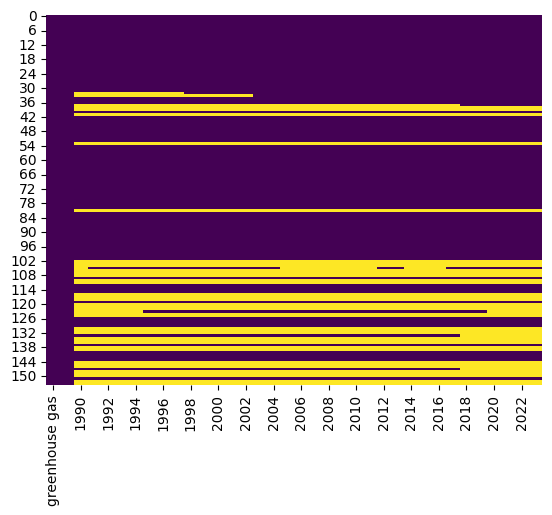

In [119]:
# Heatmap of missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.show()


# Different gases and sectors
Print all different gases and sectors

In [75]:
def print_list(title, lst):
    print(title)
    for i in lst:
        print(f"\t{i}")

print_list("Unique greenhouse gases:", df["greenhouse gas"].unique())
print_list("Unique sectors:", df["sector"].unique())


Unique greenhouse gases:
	Total Greenhouse Gases (kt CO2-eqv.)
	Carbon Dioxide (CO2) (kt)
	Biogenic carbon dioxide (CO2) from fuels (kt)
	Methane (CH4) (t)
	Nitrous Oxide (N2O) (kt CO2-eqv.)
	Methane (CH4) (kt CO2-eqv.)
	Nitrous Oxide (N2O) (t)
	Hydrofluorocarbons (HFCs) (kt CO2-eqv.)
	Perfluorocarbons (PFCs) (kt CO2-eqv.)
	Sulphur Hexafluoride (SF6) (kg)
	Sulphur Hexafluoride (SF6) (kt CO2-eqv.)
Unique sectors:
	NATIONAL TOTAL (excluding LULUCF, excluding international transports)
	NATIONAL TOTAL (excluding LULUCF, including international transports)
	NATIONAL TOTAL (including LULUCF, excluding international transports)
	NATIONAL TOTAL (including LULUCF, including international transports)
	OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL
	WASTE, TOTAL
	ELECTRICITY AND DISTRICT HEATING, TOTAL
	INDUSTRY, TOTAL
	DOMESTIC TRANSPORT, TOTAL
	INTERNATIONAL TRANSPORT, TOTAL
	AGRICULTURE, TOTAL
	SOLVENT USE AND OTHER PRODUCT USE, TOTAL
	HEATING OF HOUSES AND PREMISES, TOTAL
	LAND-USE, LAND-USE CH

# Group
How much of kg / t / kt / kt CO2-eqv. are produces by each sector ?  
There are 4 different units kt CO2-eqv, kt, t, kg so we are gonna divide them.

There are already rows for the total by sector so we are gonna use them.

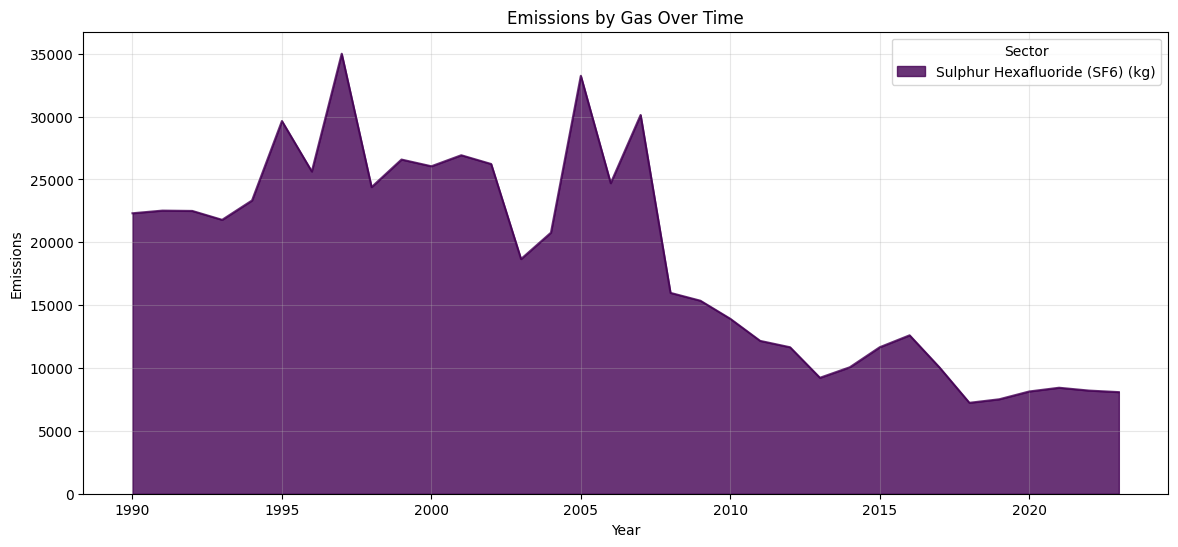

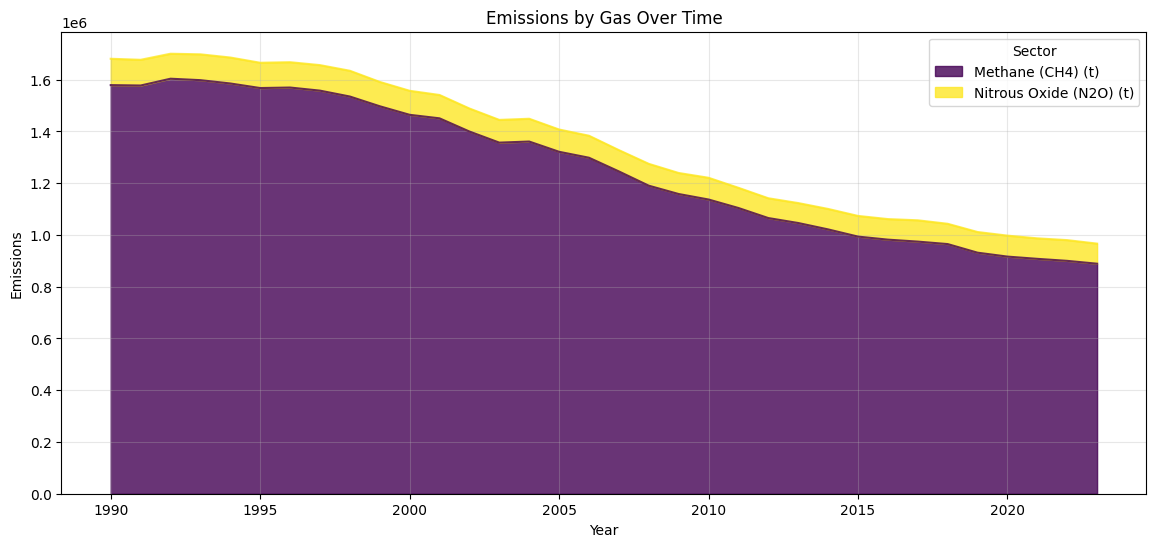

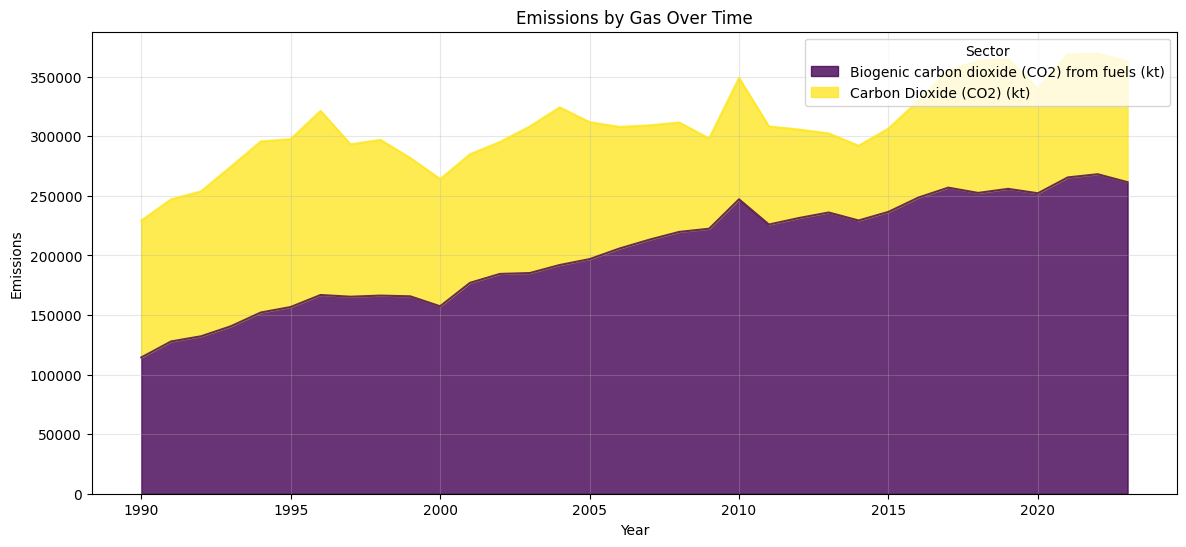

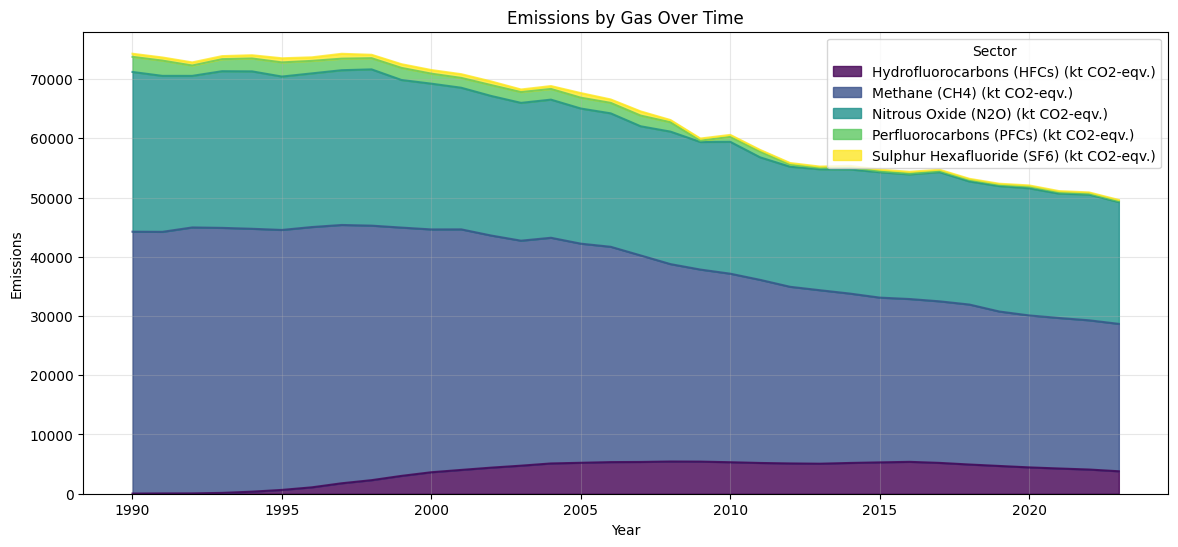

In [ ]:
def plot(df, unit):
    grouped_unit = df[df["greenhouse gas"].str.contains(unit, case=False, na=False)]
    grouped_unit = grouped_unit.set_index("greenhouse gas")

    # Transpose so years are on the X-axis
    grouped_unit.T.plot.area(figsize=(14, 6), colormap="viridis", alpha=0.8)

    plt.title("Emissions by Gas Over Time")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.legend(title="Sector", loc="upper right")
    plt.grid(alpha=0.3)
    plt.show()

# Remove total to not count it twice
rm_tot = df[df["greenhouse gas"] != "Total Greenhouse Gases (kt CO2-eqv.)"]

# Group by 'greenhouse gas' and sum numeric columns
grouped = rm_tot.groupby(["greenhouse gas"], as_index=False).sum(numeric_only=True)

plot(grouped, r"\(kg\)")
plot(grouped, r"\(t\)")
plot(grouped, r"\(kt\)")
plot(grouped, r"\(kt CO2-eqv.\)")


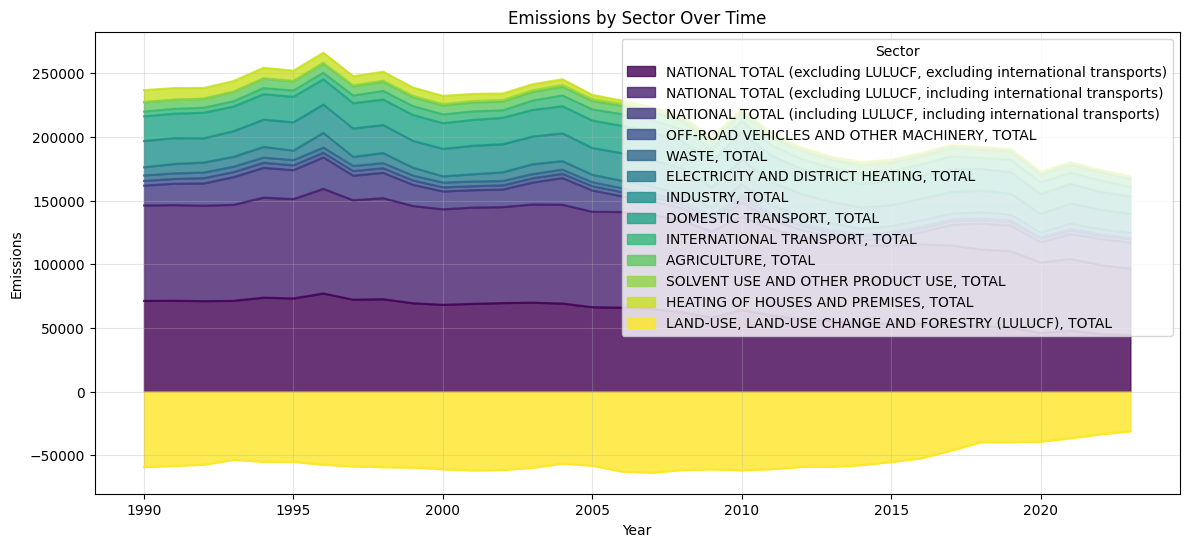

In [117]:

df_filtered = df[df["greenhouse gas"] == "Total Greenhouse Gases (kt CO2-eqv.)"]

df_filtered = df_filtered.drop(columns=["greenhouse gas"])
df_filtered_no_nt = df_filtered[df_filtered["sector"] != "NATIONAL TOTAL (including LULUCF, excluding international transports)"] # contains positive and negative values which can't be plotted on a stacked area chart
df_filtered.set_index("sector", inplace=True)
df_filtered_no_nt.set_index("sector", inplace=True)
# print(df_filtered_no_nt.to_string())

# Transpose so years are on the X-axis
df_filtered_no_nt.T.plot.area(figsize=(14, 6), colormap="viridis", alpha=0.8)

# Formatting
plt.title("Emissions by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend(title="Sector", loc="upper right")
plt.grid(alpha=0.3)
plt.show()

# Describe
Describe total for years and sectors

In [118]:
print(df_filtered.describe().to_string())
print()
print(df_filtered.T.describe().to_string())

               1990          1991          1992          1993          1994          1995          1996          1997          1998          1999          2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016          2017          2018          2019          2020          2021          2022          2023
count     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000     14.000000
mean   13515.221429  13781.278571  1